# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import re

## Read in the file `craftcans.csv`, and look at the first first rows

In [4]:
df = pd.read_csv (r'C:\Users\Dan\Documents\02 Education\Lede\06-homework\beer\craftcans.csv')
df.head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


How many rows do you have in the data? What are the column types?

In [49]:
df.shape

(2416, 7)

In [50]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

There's no information in the dataset about volume, so I'm going to assume that the number of beers - i.e. the number of rows per brewery - corresponds to the volume of production. This is probably wrong, but it's a working assumption that enables me to answer the question.

In [51]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

Brewery Vivant produces 62 beers. Go down the list maybe the number of beers is a proxy for volume.

## What is the most common ABV? (alcohol by volume)

ABV is a string, not a number, so it can't be used to create a histogram. I used regex to remove the '% symbol, converted the remainder to a float,and then created a histogram. Looks like the most common value is about 5%.

array([[<AxesSubplot:title={'center':'ABV'}>]], dtype=object)

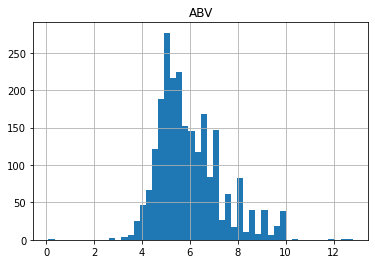

In [13]:
df_new = df.replace(to_replace ='[%]', value = '', regex = True)
df_new['ABV'] = df_new['ABV'].astype(float)
df_new.hist('ABV',bins = 50)

I used 'mode' on the new series and the original series. Indeed, the most common value is 5%.

In [14]:
df_new.ABV.mode()

0    5.0
dtype: float64

In [15]:
df.ABV.mode()

0    5.00%
dtype: object

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

I did all this above. I'll just repeat it here, since this is being graded by machine (right?).

In [16]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [18]:
df = df.replace(to_replace ='[%]', value = '', regex = True)
df.ABV

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [19]:
df['ABV'] = df['ABV'].astype(float)
df.ABV

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [20]:
print("The mean ABV is",df.ABV.mean(),".")
print("The median ABV is",df.ABV.median(),".")
print("The maximum ABV is",df.ABV.max(),".")
print("The minimum ABV is",df.ABV.min(),".")

The mean ABV is 5.977342419080068 .
The median ABV is 5.6 .
The maximum ABV is 12.8 .
The minimum ABV is 0.1 .


The boxplot below doesn't show the mean, only the median, quartiles, maximum, minimum and a few outliers. Does show the skew towards higher alcohol content.

<AxesSubplot:>

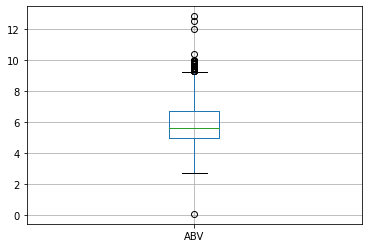

In [21]:
df.boxplot(column='ABV')

array([[<AxesSubplot:title={'center':'ABV'}>]], dtype=object)

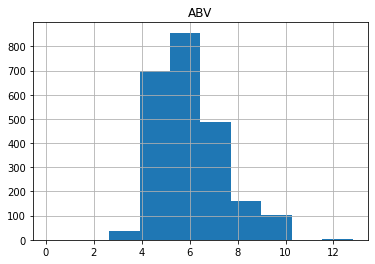

In [22]:
df.hist(column='ABV')

The bins default to a width of one, which is too wide to show the level of detail I prefer. Let's try it again.

array([[<AxesSubplot:title={'center':'ABV'}>]], dtype=object)

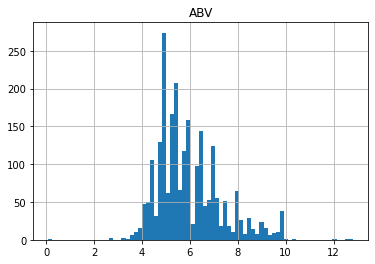

In [23]:
df.hist(column='ABV',bins=75)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [52]:
print("There are",df['ABV'].notnull().sum(),"ABV values.")
print("There are",df['ABV'].isna().sum(),"missing ABV values.")

There are 2348 ABV values.
There are 68 missing ABV values.


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [53]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [26]:
Brooklyn_beer = df["Location"].isin(["Brooklyn, NY"])
df[Brooklyn_beer]['Beer']

115                              4Beans
210                              Jammer
246                             Abigale
404                       Nomader Weiss
421                                 Rad
439                        Molotov Lite
588                             Bengali
713                       Sensi Harvest
969                              Hi-Res
987               KelSo Nut Brown Lager
1057                      Global Warmer
1074                 Autumnation (2013)
1093               KelSo India Pale Ale
1267                          The Crisp
1268                       Sweet Action
1269                      Righteous Ale
1270                      Bengali Tiger
1305                      KelSo Pilsner
1365    Hipster Ale (Two Roads Brewing)
1366                        Bikini Beer
1373                East India Pale Ale
1624                             3Beans
1836                         Brownstone
1857                Brooklyn Summer Ale
1962    Hipster Ale (Westbrook Brewing)


## What brewery in Brooklyn puts out the most cans of beer?

I'll assume that the most brands -- i.e., rows -- is the same as "most cans."

In [27]:
df[Brooklyn_beer]['Brewery'].value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [54]:
Sixpoint = df[df['Brewery'].str.contains('Sixpoint',na=False)]
Sixpoint['Style'].value_counts().head(5)

American IPA                      4
Baltic Porter                     2
Rye Beer                          2
American Double / Imperial IPA    2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [55]:
NY_Brew = df[df['Location'].str.contains('NY',na=False)]
NY_Brew = NY_Brew.Brewery.unique()
for item in NY_Brew:
    print(item)

Sixpoint Craft Ales
Evil Twin Brewing
Chatham Brewing
Newburgh Brewing Company
Southampton Publick House
Montauk Brewing Company
Matt Brewing Company
The Bronx Brewery
KelSo Beer Company
Brooklyn Brewery
The Manhattan Brewing Company
Blue Point Brewing Company
Bomb Beer Company
Dundee Brewing Company
Upstate Brewing Company
Butternuts Beer and Ale


### Now *count* all of the breweries in New York state

In [39]:
df[df['Location'].str.contains(", NY", na=False)].count()

Beer        74
Brewery     74
Location    74
Style       74
Size        74
ABV         73
IBUs        46
dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [57]:
df[df['Style'].str.contains('IPA',na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.70%,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.20%,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [32]:
# df['IBUs'].replace('Does not apply',np.nan)
# df_IBU = df['IBUs'].astype(float)

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [12]:
df['IBUs'] = df['IBUs'].replace('Does not apply',np.nan)
# df_IBUs = df['IBUs'].astype(float)
df.IBUs = pd.to_numeric(df.IBUs, errors='coerce')
np.mean(df.IBUs)


42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

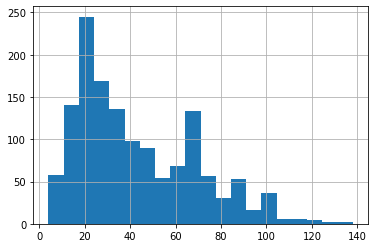

In [14]:
df.IBUs.hist(bins = 20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [40]:
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [15]:
df.IBUs.quantile(q=.75)

64.0

In [42]:
pd.set_option('display.max_rows', 100)
df[df.IBUs >= 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.20%,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.90%,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85.0


## List all of the beers with IBUs below the 25th percentile

In [25]:
df.IBUs = pd.to_numeric(df.IBUs, errors='coerce')
df.IBUs.quantile(q=0.25)

21.0

In [24]:
df.IBUs = pd.to_numeric(df.IBUs, errors='coerce')
df.sort_values('IBUs', ascending = True)[:21]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2339,Summer Solstice (2011),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.60%,4.0
1860,Summer Solstice Cerveza Crema (2009),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.60%,4.0
1303,Summer Solstice,Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.60%,4.0
1340,Westbrook Gose,Westbrook Brewing Company,"Mt. Pleasant, SC",Gose,12 oz.,4.00%,5.0
169,Yo Soy Un Berliner,Freetail Brewing Company,"San Antonio, TX",Berliner Weissbier,12 oz.,4.40%,5.0
1061,Chickawawa Lemonale,Great River Brewery,"Davenport, IA",Fruit / Vegetable Beer,12 oz.,5.00%,5.0
1903,Devils Tramping Ground Tripel,Aviator Brewing Company,"Fuquay-Varina, NC",Tripel,12 oz.,9.20%,5.0
318,18th Anniversary Gose,Real Ale Brewing Company,"Blanco, TX",Gose,12 oz.,4.40%,5.0
2064,Winter Solstice,Anderson Valley Brewing Company,"Boonville, CA",Winter Warmer,12 oz.,6.90%,6.0
313,Mr. Blue Sky,Griffin Claw Brewing Company,"Birmingham, MI",American Pale Wheat Ale,16 oz.,4.50%,6.0


Looks like any beer with an IBU of 8 or below is in the 25th percentile.

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

I'm going to assume that by 'type' of beer you mean 'Style' of beer.

<AxesSubplot:ylabel='Style'>

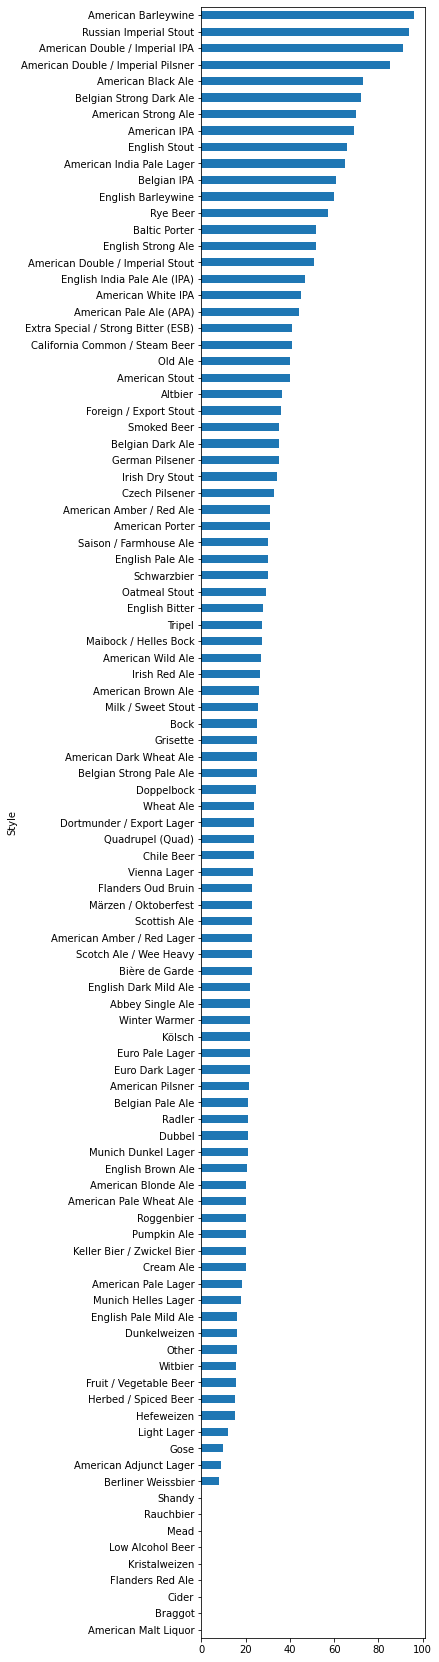

In [43]:
df.groupby("Style")['IBUs'].median().sort_values(na_position='first').plot(kind='barh', figsize=(4, 30))

In [62]:
pd.set_option('display.max_rows', 100)
df['IBUs'] = df['IBUs'].astype(float)
df_medianIBUs = df.groupby(['Style'])['IBUs'].median()
df_medianIBUs.sort_values(ascending = False)


Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
English Strong Ale                     52.0
Baltic Porter                          52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

<AxesSubplot:>

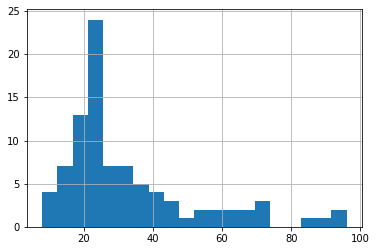

In [82]:
df_Median_IBUs = df_medianIBUs.sort_values(ascending = False)
df_Median_IBUs.hist(bins = 20)

In [29]:
df.IBUs = pd.to_numeric(df.IBUs, errors='coerce')

In [44]:
df[df.IBUs > 64].Style.value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [45]:
df[df.IBUs < 21].Style.value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [46]:
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.describe()

count    112.000000
mean      18.982143
std        9.616036
min        6.000000
25%       13.750000
50%       18.000000
75%       20.250000
max       64.000000
Name: IBUs, dtype: float64

## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

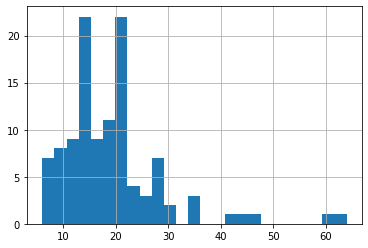

In [48]:
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.hist(bins=25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [49]:
df[df.Style.str.contains("IPA", na=False)].IBUs.describe()

count    392.000000
mean      71.948980
std       19.545669
min       30.000000
25%       60.000000
50%       70.000000
75%       85.000000
max      138.000000
Name: IBUs, dtype: float64

<AxesSubplot:>

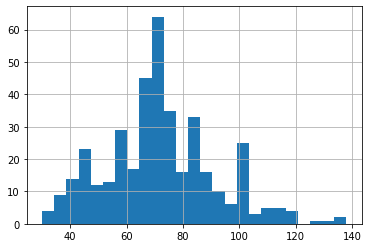

In [50]:
df[df.Style.str.contains("IPA", na=False)].IBUs.hist(bins=25)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

<AxesSubplot:>

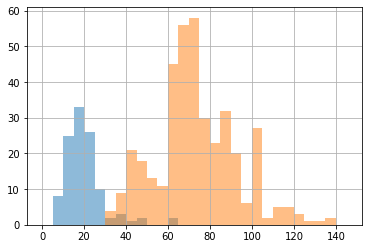

In [51]:
# ax = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.hist(alpha=0.5)
# df[df.Style.str.contains("IPA", na=False)].IBUs.hist(ax=ax, alpha=0.5, bins=20)
ax = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.hist(alpha=0.5, bins=range(0,150,5))
df[df.Style.str.contains("IPA", na=False)].IBUs.hist(ax=ax, alpha=0.5, bins=range(0,150,5))

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [52]:
df[df.Style.str.contains("IPA", na=False)].ABV.describe()

count       560
unique       61
top       7.00%
freq         62
Name: ABV, dtype: object

In [53]:
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].ABV.describe()

count       183
unique       31
top       5.00%
freq         36
Name: ABV, dtype: object

<AxesSubplot:>

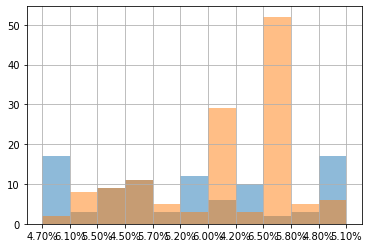

In [54]:
# ax = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].ABV.hist(alpha=0.5, bins=23)
# df[df.Style.str.contains("IPA", na=False)].ABV.hist(ax=ax, alpha=0.5, bins=30)
ax = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].ABV.hist(alpha=0.5, bins=range(0,12,1))
df[df.Style.str.contains("IPA", na=False)].ABV.hist(ax=ax, alpha=0.5, bins=range(0,12,1))

## Good work!

If you made it this far you deserve a drink.